In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from skimage import io
from sklearn.preprocessing import normalize

# Part 1

In [2]:
template_path = "./dataset/template.jpg"
group_img_path = "./dataset/group_img.jpg"

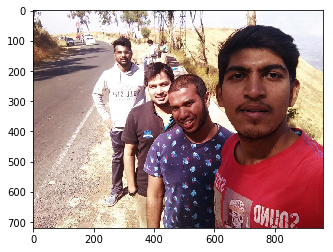

In [3]:
im = Image.open(group_img_path)
imgplot = plt.imshow(im)

# Normalize matrix

In [4]:
def Normalize(mat):
    #row_sums = mat.sum()
    new_matrix = (mat -mat.mean())/ np.std(mat)
    return new_matrix

In [5]:
a = np.arange(6).reshape((3, 2))
Normalize(a)

array([[-1.46385011, -0.87831007],
       [-0.29277002,  0.29277002],
       [ 0.87831007,  1.46385011]])

# Load Image in grayscale

In [6]:
def toGrayscale(img_path):
    img = io.imread(img_path, as_gray=True)
    img = np.asarray(img)
    plt.imshow(img,cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
    return img

In [7]:
def Correlation(img,kernel):
    img = np.asarray(img)
    h,w = img.shape[0],img.shape[1]
    
    #################################################################################
    stride = 1
    new_i = 0
    fil_h = kernel.shape[0]
    fil_w = kernel.shape[1]
    new_img = np.zeros((h-fil_h+1,w-fil_w+1))
    #################################################################################
    
    for i in range(h - fil_h+1):
        for j in range(w - fil_w+1):
            im_region = img[i:(i + fil_h), j:(j + fil_w)]
            im_region = Normalize(im_region)
            r = np.multiply(im_region,kernel).sum()
            if r == 0:
                continue
            new_img[i][j] = float(r/fil_h*fil_w)
    return new_img

In [8]:
# def NCC(img,template):
#     #print(img.shape)
#     l,b = img.shape[0],img.shape[1]
#     new_img = np.zeros((l,b))
#     #print(new_img.shape)
    
#     #################################################################################
#     stride = 1
#     new_i = 0
#     fil_l = template.shape[0]
#     fil_b = template.shape[1]
#     #################################################################################
    
#     for i in range(fil_l,l-(fil_l-1),stride):
#         new_j = 0
#         for j in range(fil_b,b-(fil_b-1),stride):
#             r = np.multiply(img[new_i:i,new_j:j],template).sum()
#             new_j += stride 
#             new_img[i][j] = float(r/(fil_l*fil_b))
#             r = 0
#         new_i += stride
#     #print(new_img.shape)
#     return new_img

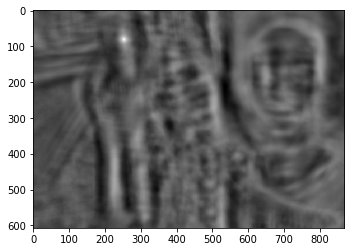

In [9]:
template = toGrayscale(template_path)
template = Normalize(template)
group_img = toGrayscale(group_img_path)
resulting_img = Correlation(group_img,template)
plt.imshow(resulting_img,cmap=plt.get_cmap('gray'))

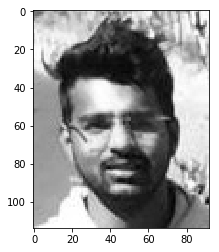

In [10]:
plt.imshow(template,cmap=plt.get_cmap('gray'))

In [11]:
# x = np.array(([2,3,1,0],[2,4,1,0],[1,2,1,0],[2,3,5,0]))
# y = np.array(([1,4,2],[1,3,1],[1,5,1],[4,1,5]))
# res_dot = np.dot(x,y)
# #res_mul= np.multiply(x,y)
# res_matmul = np.matmul(x,y)
# print(np.dot([1,2,3,4],[4,3,2,1]))
# print(res_matmul)
# print(res_dot)

# Part 2

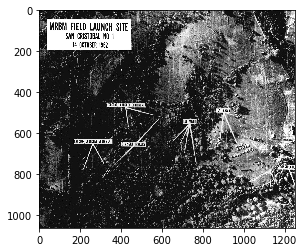

In [12]:
img_path = "./dataset/u2cuba.jpg"
template_path = "./dataset/trailer.png"
template = toGrayscale(template_path)
template = Normalize(template)
img = toGrayscale(img_path)

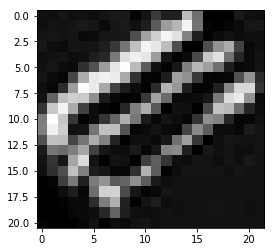

In [13]:
plt.imshow(template,cmap=plt.get_cmap('gray'))

## With smaller filter

/work/test/venv/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


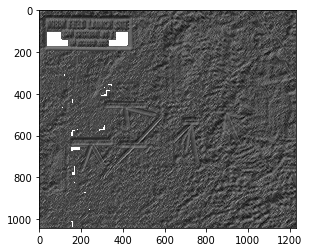

In [14]:
resulting_img = Correlation(img,template)
plt.imshow(resulting_img,cmap=plt.get_cmap('gray'))

# Part3

## With Bigger Filter

/work/test/venv/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


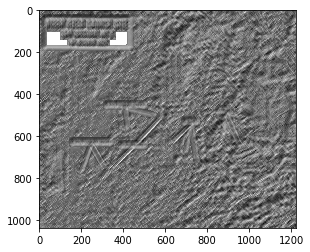

In [15]:
template_path = "./dataset/trailerSlightlyBigger.png"
template = toGrayscale(template_path)
template = Normalize(template)
img = toGrayscale(img_path)
resulting_img = Correlation(img,template)
plt.imshow(resulting_img,cmap=plt.get_cmap('gray'))

# Part 4